In [2]:
!pip install langchain

  Obtaining dependency information for langchain from https://files.pythonhosted.org/packages/6a/ca/27a0131c50d4ea8877d6183c7a2aaf16660b17d9b35144bb75a7393639eb/langchain-0.0.353-py3-none-any.whl.metadata
  Obtaining dependency information for jsonpatch<2.0,>=1.33 from https://files.pythonhosted.org/packages/73/07/02e16ed01e04a374e644b575638ec7987ae846d25ad97bcc9945a3ee4b0e/jsonpatch-1.33-py2.py3-none-any.whl.metadata
  Obtaining dependency information for langchain-community<0.1,>=0.0.2 from https://files.pythonhosted.org/packages/81/ac/4002f920066d13c50d93c3745f8a96c744a9413d2edefbf021dff0e8dcee/langchain_community-0.0.7-py3-none-any.whl.metadata
  Obtaining dependency information for langchain-core<0.2,>=0.1.4 from https://files.pythonhosted.org/packages/03/83/b6cb51143388fd12ac9543cde97b61649bf0f2f0cd8ddcaee87750a93781/langchain_core-0.1.4-py3-none-any.whl.metadata
  Obtaining dependency information for langsmith<0.1.0,>=0.0.70 from https://files.pythonhosted.org/packages/c7/a1/6d5

In [ ]:
# from langchain import PromptTemplate, LLMChain
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

In [16]:
!pip install -q -U google-generativeai langchain-google-genai

In [17]:
import google.generativeai as genai
from langchain_google_genai import ChatGoogleGenerativeAI

In [18]:
import os

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("GOOGLE_AI_STUDIO")

genai.configure(api_key=secret_value_0)

In [23]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


In [3]:
template = """Question: {question}
Let's think step by step.
Answer: """
prompt = PromptTemplate(template=template, input_variables=["question"])

In [5]:
prompt

PromptTemplate(input_variables=['question'], template="Question: {question}\nLet's think step by step.\nAnswer: ")

In [42]:
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = secret_value_0

llm = ChatGoogleGenerativeAI(model="gemini-pro")
llm_chain = LLMChain(prompt=prompt, llm=llm)

In [43]:
question = """ What is the population of the capital of the country where the
Olympic Games were held in 2016? """

llm_chain.invoke(question)

{'question': ' What is the population of the capital of the country where the\nOlympic Games were held in 2016? ',
 'text': 'The Olympic Games were held in Rio de Janeiro in 2016, so the capital of the country is Rio de Janeiro. The population of Rio de Janeiro is approximately 6.7 million.'}

In [44]:
for chunk in llm.stream("Write a limerick about LLMs."):
    print(chunk.content)
    print("---")

There once was an LLM so smart,
It could learn from the smallest
---
 bit of art.
It read books and watched shows,
From history to those,
And now it can write tales from the heart.
---


In [31]:
from IPython.display import Markdown
import textwrap

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

result = llm.invoke("Write the main components that make LangChain Framework")
to_markdown(result.content)

> 1. **LangChain Core:** This is the core component of the LangChain Framework and provides the basic functionality for building and executing language models. It includes modules for data preprocessing, model training, inference, and evaluation.
> 
> 2. **LangChain Model Zoo:** This is a collection of pre-trained language models that can be used for various natural language processing tasks. The models are trained on large datasets and can be fine-tuned for specific tasks.
> 
> 3. **LangChain Toolkit:** This is a set of tools and utilities that help developers build and deploy language models using the LangChain Framework. It includes tools for data preprocessing, model training, inference, and evaluation.
> 
> 4. **LangChain API:** This is a set of APIs that allow developers to interact with the LangChain Framework programmatically. The APIs can be used to create and train language models, perform inference, and evaluate the performance of models.
> 
> 5. **LangChain Documentation:** This is a comprehensive set of documentation that provides detailed information about the LangChain Framework. The documentation includes tutorials, guides, and reference materials that help developers learn how to use the framework.
> 
> 6. **LangChain Community:** This is a vibrant community of developers, researchers, and practitioners who are interested in using the LangChain Framework for natural language processing tasks. The community provides support, shares knowledge, and collaborates on projects.

### Add a Wikipedia and Calculator AGENT

In [10]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=90742f2c08a74ee8f073e9b95adbb12503bf9fbdc7b354e66cf04a1a7194331c
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [15]:
import wikipedia
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

# Set up the Wikipedia API wrapper
api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=1000)
tool = WikipediaQueryRun(api_wrapper=api_wrapper)

# Search for a topic using the wikipedia library
search_topic = "Deep Learning is"
results = wikipedia.search(search_topic)

if results:
    # Use the langchain_community tool to retrieve information
    tool_input = {"query": results[0]}  # Provide the required tool_input
    topic_summary = tool.run(tool_input=tool_input)
    print("Wikipedia Summary:", topic_summary)
else:
    print("No results found.")

Wikipedia Summary: Page: Deep learning
Summary: Deep learning is the subset of machine learning methods based on artificial neural networks with representation learning. The adjective "deep" refers to the use of multiple layers in the network. Methods used can be either supervised, semi-supervised or unsupervised.Deep-learning architectures such as deep neural networks, deep belief networks, recurrent neural networks, convolutional neural networks and transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance. While deep learning algorithms have shown remarkable performances on various tasks, they are susceptible to inheriting and amplifying biases present in their training data. This can manifes

In [51]:
generation_config = {
  "temperature": 0.9,
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 2048,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_ONLY_HIGH"
  }
]


model = genai.GenerativeModel(model_name="gemini-pro",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

In [52]:
from langchain.agents import load_tools, initialize_agent, AgentType
llm = ChatGoogleGenerativeAI(model="gemini-pro")
tools = load_tools(["wikipedia", "llm-math"], llm=llm)
agent = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)
question = """What is the square root of the population of the capital of the
Country where the Olympic Games will be held in 2024?"""
agent.run(question)



> Entering new AgentExecutor chain...
I should find out the capital of the country where the Olympic Games will be held in 2024, then find the population of the capital and calculate the square root.
Action: Wikipedia
Action Input: Olympic Games 2024
Observation: Page: 2024 Summer Olympics
Summary: The 2024 Summer Olympics (French: Jeux olympiques d'été de 2024), officially the Games of the XXXIII Olympiad (French: Jeux de la XXXIIIe Olympiade) and commonly known as Paris 2024, is an upcoming international multi-sport event scheduled to take place from 26 July to 11 August 2024 in France, with Paris as the main host city and 16 other cities spread across metropolitan France, plus one subsite in Tahiti—an island within the French overseas country and overseas collectivity of French Polynesia.Paris was awarded the Games at the 131st IOC Session in Lima, Peru, on 13 September 2017. After multiple withdrawals that left only Paris and Los Angeles in contention, the International Olympic C

/opt/conda/lib/python3.10/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /opt/conda/lib/python3.10/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Paris
Summary: Paris is the capital and most populous city of France. With an official estimated population of 2,102,650 residents as of 1 January 2023 in an area of more than 105 km2 (41 sq mi), Paris is the fourth-most populated city in the European Union and the 30th most densely populated city in the world in 2022. Since the 17th century, Paris has been one of the world's major centres of finance, diplomacy, commerce, culture, fashion, and gastronomy. For its leading role in the arts and sciences, as well as its early and extensive system of street lighting, in the 19th century, it became known as the City of Light.The City of Paris is the centre of the Île-de-France region, or Paris Region, with an official estimated population of 12,271,794 inhabitants on 1 January 2023, or about 19% of the population of France, making the region France's primate city. The Paris Region had a GDP of €765 billion (US$1.064 trillion, PPP) in 2021, the highest in the European Unio

'1480.36'

In [54]:
question = """"How much is 369 * 1235 ?"""
agent.run(question)



> Entering new AgentExecutor chain...
I should use a calculator to multiply the two numbers.
Action: Calculator
Action Input: 369 * 1235
Observation: Answer: 455715
Thought:The final answer is now known.
Final Answer: 455715

> Finished chain.


'455715'

###  Agents to manage history/memory. 

In [55]:
from langchain import OpenAI, ConversationChain
llm = ChatGoogleGenerativeAI(model="gemini-pro")
chatbot_llm = llm
chatbot = ConversationChain(llm=chatbot_llm , verbose=True)
chatbot.predict(input='Hello')



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hello
AI:

> Finished chain.


"Hey there! How can I assist you today? I'm here to answer any questions you may have or to simply chat. Feel free to ask me anything that's on your mind!"

In [56]:
chatbot.predict(input='Can I ask you a question? Are you an AI?. Who made you')



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hello
AI: Hey there! How can I assist you today? I'm here to answer any questions you may have or to simply chat. Feel free to ask me anything that's on your mind!
Human: Can I ask you a question? Are you an AI?. Who made you
AI:

> Finished chain.


"Absolutely, you can ask me anything! I am indeed an AI, or an artificial intelligence, created by a team of talented engineers and scientists at Google. They work tirelessly to develop and train me to be knowledgeable, informative, and engaging. I'm constantly learning and evolving, thanks to their efforts and the vast amount of data I'm exposed to."

### Read from a file

In [60]:
!pip install pypdf
!pip install rapidocr-onnxruntime

  Obtaining dependency information for rapidocr-onnxruntime from https://files.pythonhosted.org/packages/06/bd/058ea31f987eab3160c40b88ee28918813d42054d1261a7fd8019aed05db/rapidocr_onnxruntime-1.3.9-py3-none-any.whl.metadata
  Obtaining dependency information for onnxruntime>=1.7.0 from https://files.pythonhosted.org/packages/7a/cf/6aa8c56fd63f53c2c485921e411269c7b501a2b4e634bd02f226ab2d5d8e/onnxruntime-1.16.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for Pillow<=10.0.1 from https://files.pythonhosted.org/packages/7a/07/e896b096a77375e78e02ce222ae4fd6014928cd76c691d312060a1645dfa/Pillow-10.0.1-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 54.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [62]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("https://d4mucfpksywv.cloudfront.net/better-language-models/language_models_are_unsupervised_multitask_learners.pdf", extract_images=True)
pages = loader.load()
pages[0].page_content

'Language Models are Unsupervised Multitask Learners\nAlec Radford*1Jeffrey Wu*1Rewon Child1David Luan1Dario Amodei**1Ilya Sutskever**1\nAbstract\nNatural language processing tasks, such as ques-\ntion answering, machine translation, reading com-\nprehension, and summarization, are typically\napproached with supervised learning on task-\nspeciﬁc datasets. We demonstrate that language\nmodels begin to learn these tasks without any ex-\nplicit supervision when trained on a new dataset\nof millions of webpages called WebText. When\nconditioned on a document plus questions, the an-\nswers generated by the language model reach 55\nF1 on the CoQA dataset - matching or exceeding\nthe performance of 3 out of 4 baseline systems\nwithout using the 127,000+ training examples.\nThe capacity of the language model is essential\nto the success of zero-shot task transfer and in-\ncreasing it improves performance in a log-linear\nfashion across tasks. Our largest model, GPT-2,\nis a 1.5B parameter Tran

In [74]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [83]:
vector = embeddings.embed_query("Hello World. This is Agney")
vector[:5]

[0.045253817, 0.013954413, -0.06990617, -0.03607041, 0.047082342]

In [65]:
# FAISS vector database
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 51.9 MB/s eta 0:00:0000:0100:01


In [66]:
from langchain.vectorstores import FAISS
db = FAISS.from_documents(pages, embeddings)

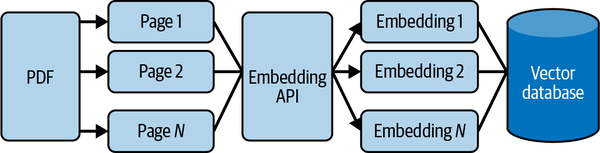

In [73]:
q = "How is GPT able to do Zero shot tasks so well"
db.similarity_search(q)[0]

Document(page_content='Language Models are Unsupervised Multitask Learners\nFigure 4. The performance of LMs trained on WebText as a func-\ntion of model size.\nis similar to the work of Jozefowicz et al. (2016) which\nscaled RNN based language models on the 1 Billion Word\nBenchmark. Bajgar et al. (2016) also previously improved\nresults on the Children’s Book Test by creating a much larger\ntraining dataset out of Project Gutenberg to supplement the\nstandard training dataset. Hestness et al. (2017) conducted\na thorough analysis of how the performance of various deep\nlearning models changes as a function of both model capac-\nity and dataset size. Our experiments, while much noisier\nacross tasks, suggest similar trends hold for sub-tasks of an\nobjective and continue into the 1B+ parameter regime.\nInteresting learned functionality in generative models\nhas been documented before such as the cells in an\nRNN language model performing line-width tracking and\nquote/comment detectio

In [99]:
from langchain.chains import RetrievalQA
llm = ChatGoogleGenerativeAI(model="gemini-pro", convert_system_message_to_human=True)
chain = RetrievalQA.from_llm(llm=llm, retriever=db.as_retriever())

q = "How does the performance of language models trained on WebText vary with model size, as indicated in Figure 4?"

chain(q, return_only_outputs=True)

{'result': 'According to Figure 4, the performance of language models trained on WebText improves as model size increases. This is measured in perplexity, which is a measure of how well a model can predict the next word in a sequence. The perplexity of the smallest model, with 117M parameters, is 18.4, while the perplexity of the largest model, with 1542M parameters, is 10.1. This shows that increasing the model size can lead to significant improvements in performance on language modeling tasks.'}